In [1]:
!source ./bin/activate

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
url = 'https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv'
df = pd.read_csv(url)
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [5]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    27 non-null     object 
 1   Age        27 non-null     float64
 2   Salary     27 non-null     float64
 3   Purchased  27 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [6]:
print(df2)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5    France  35.0  58000.0       Yes
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
26   France  52.0  88000.0       Yes
27    Spain  46.0  78000.0        No
28  Germany  25.0  45000.0       Yes
2

In [7]:
df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [8]:
df[['Age','Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [9]:
df.iloc[1:,0:2]

,Country,Age
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0
10,Germany,28.0


In [10]:
# seperate data into input and output

input_features = df.iloc[:,0:3].values
label = df.iloc[:,-1].values

In [11]:
# fixing nan values

xan_impute = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
xan_impute.fit(input_features[:,1:3]) #calc nan values
input_features[:,1:3] = xan_impute.transform(input_features[:,1:3]) #make changes

In [13]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [14]:
#convert label vals; 0=No and 1=Yes

le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [15]:
# convert country vals; france & spain & germany 
# categorical values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

In [24]:
input_features = ct.fit_transform(input_features)

In [25]:
#now we have input and label
train_input, test_input, train_label, test_label = train_test_split(input_features, label, test_size=0.1)
#note test_size is 0 to 1 -- 0.1 = 10% split for testing

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [28]:
from sklearn.svm import SVC

In [29]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [30]:
#calling DT classifier
# train_input, test_input, train_label, test_label
dtc = DecisionTreeClassifier()

In [31]:
# train the classifier with preprocessed split data
trained_dtc = dtc.fit(train_input, train_label)

In [32]:
pred_vals = trained_dtc.predict(test_input)

In [33]:
print(pred_vals)

[1 0 1]


In [34]:
print(test_label)

[1 0 1]


In [36]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [37]:
#using accuracy score
accuracy_score(test_label, pred_vals)

1.0

In [ ]:
# testing new input data -- try as homework
#xan_new_data = np.array([['Spain, '39','51000']])

In [41]:
# features and labels
le.classes_

array(['No', 'Yes'], dtype=object)

In [43]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)

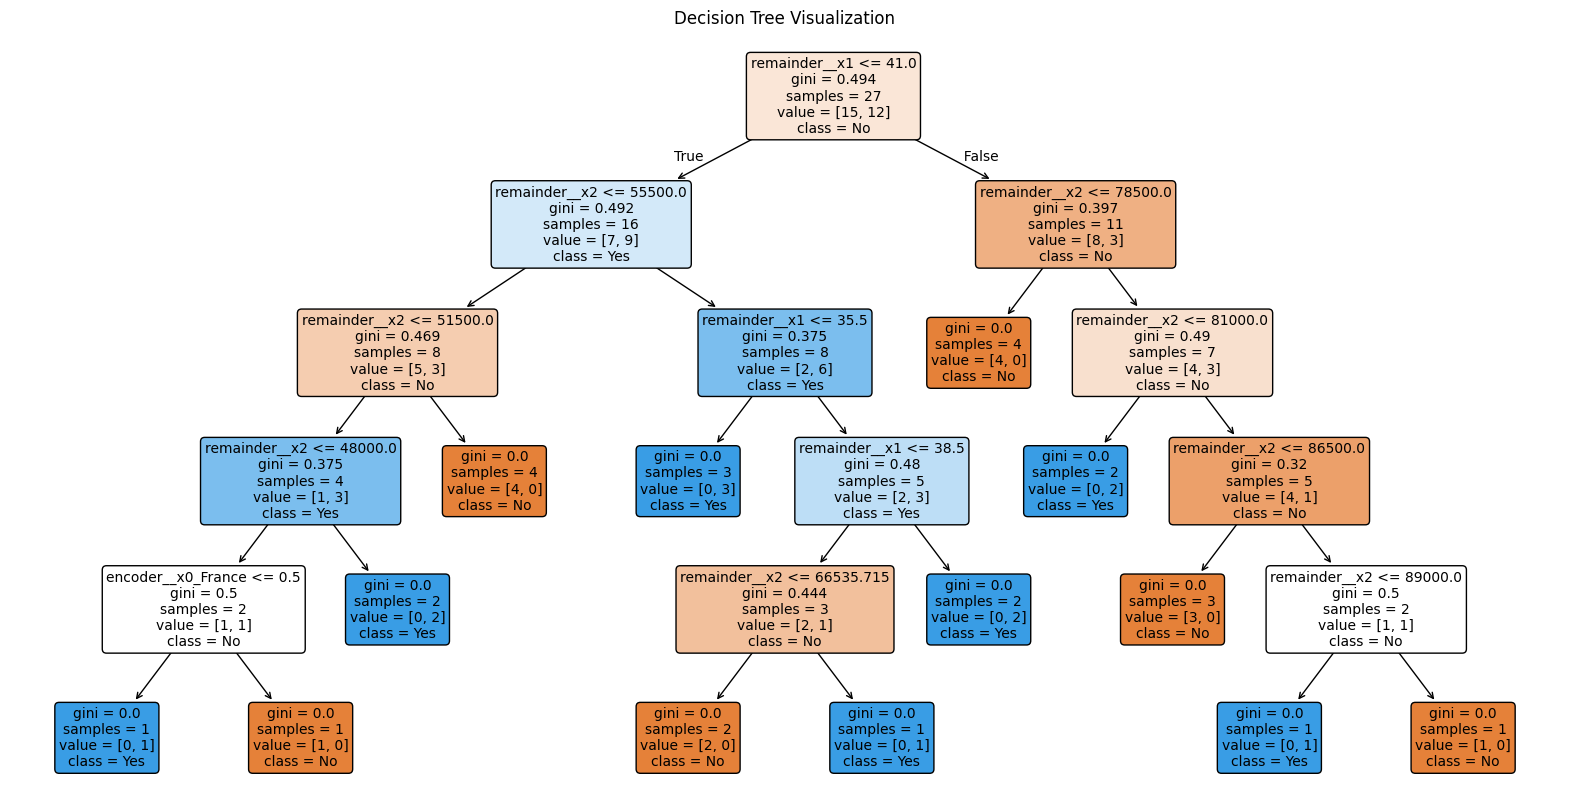

In [45]:
#use python to check decision tree graph
plt.figure(figsize=(20,10))
plot_tree(dtc, 
         feature_names = ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# STOP

In [ ]:
## other dataset
# https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/Startups_Data.csv

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/Startups_Data.csv'
df = pd.read_csv(url)
print(df)

In [ ]:
# seperate data into input and output

input_features = df.iloc[:,0:4].values
label = df.iloc[:,-1].values

In [ ]:
input_features

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder='passthrough')

In [ ]:
ct.fit_transform(input_features)

In [ ]:
train_input, test_input, train_label, test_label = train_test_split(input_features, label, test_size=0.1)

In [34]:
# https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv

In [35]:
url = 'https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv'
df = pd.read_csv(url)
print(df)

                          time   latitude   longitude  depth   mag magType  \
0     2025-04-03T03:16:50.230Z  38.840668 -122.834335   1.32  0.53      md   
1     2025-04-03T03:08:03.540Z  61.556800 -141.271600  13.40  1.20      ml   
2     2025-04-03T02:59:56.724Z  61.789200 -149.608200  38.70  1.20      ml   
3     2025-04-03T02:54:35.248Z  60.081400 -152.528700  97.80  1.40      ml   
4     2025-04-03T02:41:42.280Z  35.639833 -117.548500   8.08  0.89      ml   
...                        ...        ...         ...    ...   ...     ...   
9588  2025-03-04T03:25:43.640Z  44.739000 -111.123333   7.15 -0.37      md   
9589  2025-03-04T03:24:58.760Z  37.428500 -119.018500   3.69  1.70      md   
9590  2025-03-04T03:22:28.320Z  44.726000 -111.120667   2.38 -0.92      md   
9591  2025-03-04T03:20:13.493Z -57.288500  147.327500  10.00  4.50      mb   
9592  2025-03-04T03:18:45.450Z  39.360500 -111.194500  -0.61  1.44      md   

       nst    gap       dmin   rms  ...                   updat

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [37]:
#drop NA
df = df.dropna()

In [7]:
# seperate data into input and output

input_features = df.iloc[:,1:4].values
label = df.iloc[:,4].values

In [8]:
print(label)

[ 0.53  0.89  1.95 ... -0.92  4.5   1.44]


In [9]:
print(input_features)

[[  38.84066772 -122.83433533    1.32000005]
 [  35.6398333  -117.5485        8.08      ]
 [  38.8125     -122.82533264    1.71000004]
 ...
 [  44.726      -111.12066667    2.38      ]
 [ -57.2885      147.3275       10.        ]
 [  39.3605     -111.1945       -0.61      ]]


In [10]:
#now we have input and label
train_input, test_input, train_label, test_label = train_test_split(input_features, label, test_size=0.1)
#note test_size is 0 to 1 -- 0.1 = 10% split for testing

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
trained_lm = lm.fit(train_input,train_label)

In [14]:
pred_vals = trained_lm.predict(test_input)

In [15]:
print(pred_vals)

[3.3755078  1.48059666 1.06493947 0.17081948 1.26142198 2.37298271
 1.19385379 2.377073   0.8984121  0.45073532 1.32418789 1.07530349
 1.18667914 0.15070323 1.59636831 1.31741604 0.36815298 0.47952804
 1.25970581 1.32231074 1.40925308 1.45391291 1.1871847  1.69022339
 1.5896988  1.31914216 1.46455579 1.32753648 0.15059922 1.18909371
 1.18751092 1.45404555 1.20593181 0.31980769 1.18495164 2.3686601
 0.97286369 1.18754095 0.14006231 3.58564502 4.39307676 1.19047758
 1.1881736  0.25405949 3.10738228 0.93359976 1.19624965 1.18704929
 0.18192924 1.06329376 1.18814204 0.42806773 1.18646636 1.25847212
 0.27175882 1.79246437 0.15349264 1.45030133 1.18587269 0.43079657
 2.60353188 1.05685109 0.14675346 2.82171933 1.58429943 2.326742
 1.15680351 0.14661605 1.14312356 5.66685065 1.57148473 1.18717067
 1.18760931 1.18854851 1.18717783 6.41494741 1.45968098 1.19170725
 1.41998407 1.587742   0.88734534 1.18952217 0.15191565 1.18674051
 1.2590696  2.33479551 1.16169641 1.18850029 1.05651736 1.4542054

In [16]:
#sklearn.metrics.root_mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')[source]
from sklearn.metrics import root_mean_squared_error

In [17]:
root_mean_squared_error(test_label,pred_vals)

0.9352526780224819

In [18]:
#seaborn visuals
import seaborn as sb

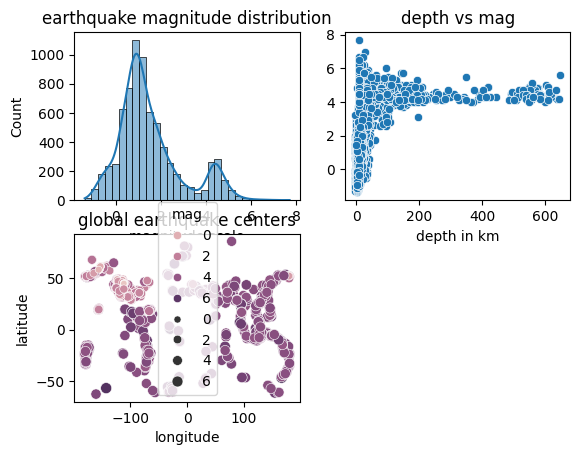

In [19]:
plt.Figure(figsize=[15,10])
#first
plt.subplot(2,2,1)
plt.title('earthquake magnitude distribution')
plt.xlabel('magnitude scale')
sb.histplot(label, kde=True, bins=30)

#second
plt.subplot(2,2,2)
plt.title('depth vs mag')
plt.xlabel('depth in km')
sb.scatterplot(x='depth', y=label, data=df)

#third globe locations
plt.subplot(2,2,3)
plt.title('global earthquake centers')
plt.xlabel('longitude')
plt.ylabel('latitude')
sb.scatterplot(x='longitude', y='latitude', size=label, data=df,hue='mag')

plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier()

In [40]:
features = ['latitude','longitude','depth']
label = 'mag'

In [41]:
feature_data = df[features]
label_data = df[labels]
print(feature_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
4     35.639833 -117.548500   8.08
5     38.812500 -122.825333   1.71
7     33.664167 -116.704833  12.83
8     35.350000 -117.808833   5.26
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[7296 rows x 3 columns]


In [42]:
train_ft,test_ft,train_lb,test_lb = train_test_split(feature_data, label_data,test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
from sklearn.metrics import mean_squared_error  , r2_score , mean_absolute_error

In [45]:
trf = rf.fit(train_ft,train_lb)

/home/ubuntu/usgs-ml/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.